In [ ]:
import sys
import numpy as np
sys.path.append('..')
from CB2325NumericaG3.aproximacao import aproximacao_exponencial, aproximacao_polinomial_aleatoria, aproximacao_polinomial_mq, R2, SSR, SST, encontrar_grau_polinomial_bic

In [ ]:
# EXEMPLO 1: ajuste polinomial por mínimos quadrados (grau 2)


x = np.array([0.0, 1.0, 2.0, 3.0])
y = np.array([1.0, 2.0, 0.0, 5.0])
pontos = (x, y)

coef = aproximacao_polinomial_mq(pontos, grau=2, plotar=False)
print("Coeficientes (grau 2):", coef)

r2 = R2(pontos, coef)
print("R²:", r2)


Coeficientes (grau 2): [ 1.  -2.   1.5]
R²: 0.6428571428571428


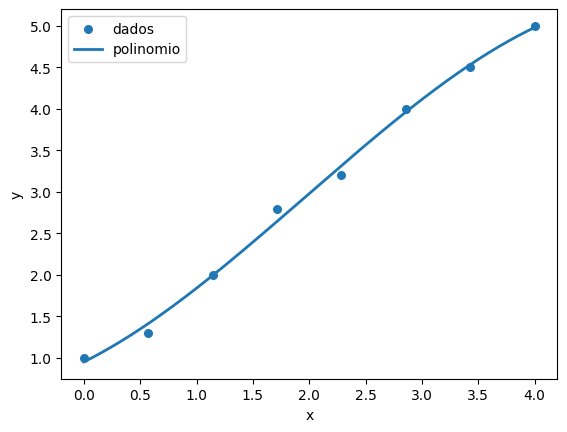

Coeficientes do polinômio: [-0.04330808  0.25620265  0.67569444  0.95151515]
R²: 0.9963211287562257


In [ ]:
# EXEMPLO 2: ajuste polinomial com gráfico com plot

x = np.linspace(0, 4, 8)
y = np.array([1.0, 1.3, 2.0, 2.8, 3.2, 4.0, 4.5, 5.0])
pontos = (x, y)

coef = aproximacao_polinomial_mq(pontos, grau=3, plotar=True)
print("Coeficientes do polinômio:", coef)
print("R²:", R2(pontos, coef))


In [ ]:
# EXEMPLO 3: busca aleatória de polinômio e comparação de R²

x = np.linspace(-1, 1, 10)
y = 2 * x**2 + 0.5 * x + 1.0
pontos = (x, y)

coef_mq = aproximacao_polinomial_mq(pontos, grau=2, plotar=False)
r2_mq = R2(pontos, coef_mq)

coef_ale = aproximacao_polinomial_aleatoria(
    pontos,
    grau=2,
    expoente=4,
    intervalo=(0, 3),
    seed=42,
    plotar=False,
)
r2_ale = R2(pontos, coef_ale)

print("Coef MQ:", coef_mq, "  R² MQ:", r2_mq)
print("Coef aleatório:", coef_ale, "  R² aleatório:", r2_ale)


Coef MQ: [2.  0.5 1. ]   R² MQ: 1.0
Coef aleatório: [1.89249672 0.53251975 1.01656691]   R² aleatório: 0.9956873669304388


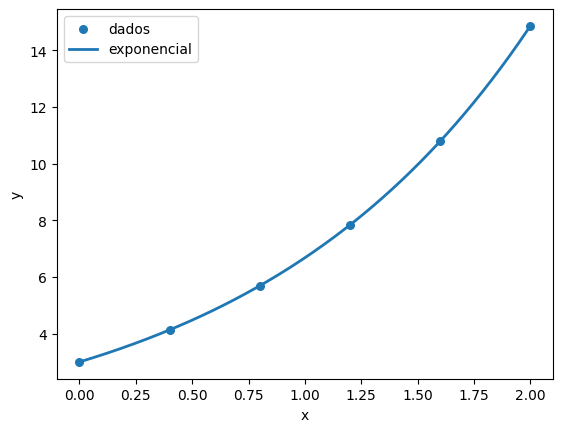

Parâmetros (c, b): [3.  0.8]
R² (modelo exponencial): 0.9499564427747902


In [ ]:
# EXEMPLO 4: ajuste exponencial y = c * exp(bx) com opção de plot

x = np.linspace(0, 2, 6)
y = 3.0 * np.exp(0.8 * x)
pontos = (x, y)

params = aproximacao_exponencial(pontos, plotar=True, ignore_negativos=False)
print("Parâmetros (c, b):", params)

# cálculo de R² da curva ajustada
y_pred = params[0] * np.exp(params[1] * x)
coef_eq = np.polyfit(x, y_pred, deg=1)
print("R² (modelo exponencial):", R2((x, y), coef_eq))


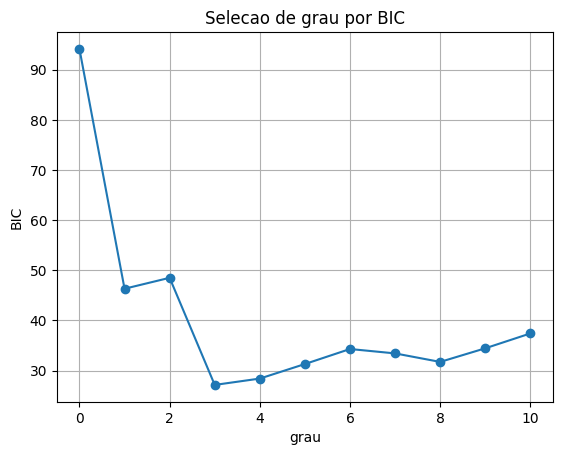

Melhor grau segundo BIC: 3
Coeficientes do polinômio escolhido: [ 1.62586114 -0.41706318  3.42052317  2.01644651]
R² do modelo selecionado: 0.9776113577468198


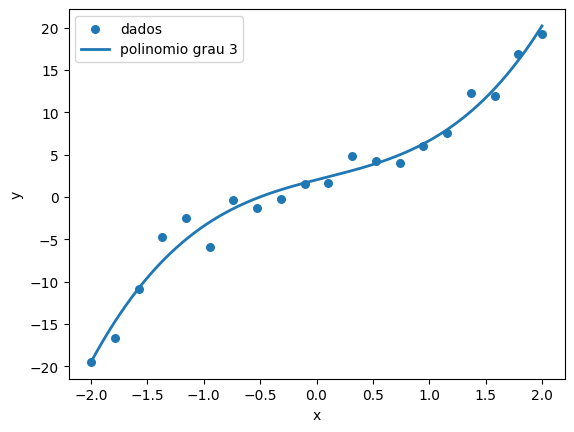

In [ ]:
# EXEMPLO 5: seleção automática do grau pelo critério BIC, com opção de plot

# gerando dados sintéticos para teste
np.random.seed(0)
x = np.linspace(-2, 2, 20)
y_true = 2*x**3 - 0.5*x**2 + 3*x + 1
y = y_true + np.random.normal(scale=2.0, size=x.size)

pontos = (x, y)

# seleção do grau usando BIC
d_best, coef_best, graus, bic_vals = encontrar_grau_polinomial_bic(
    pontos,
    d_min=0,
    d_max=10,
    plotar=True
)

print("Melhor grau segundo BIC:", d_best)
print("Coeficientes do polinômio escolhido:", coef_best)

# cálculo de R² do modelo escolhido
r2_best = R2(pontos, coef_best)
print("R² do modelo selecionado:", r2_best)

# comparação visual
import matplotlib.pyplot as plt

x_plot = np.linspace(min(x), max(x), 400)
y_aprox = np.polyval(coef_best, x_plot)

plt.scatter(x, y, label="dados", s=30)
plt.plot(x_plot, y_aprox, label=f"polinomio grau {d_best}", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
